In [23]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from monai.transforms import LoadImage, Spacing, Compose, LoadImaged, CenterSpatialCrop, EnsureChannelFirstd, NormalizeIntensityd
import glob
import os
from monai.data import Dataset, DataLoader
import torch
import subprocess

In [47]:
# data_dir = "../preprocessed_chaos/T2/"
data_dir ='../other/CT_withGT_proc/'
images = sorted(glob.glob(os.path.join(data_dir, "images/case_*/slice*.nii.gz")))
labels = sorted(glob.glob(os.path.join(data_dir, "labels/case_*/slice*.nii.gz")))

example_dataset = [{"image": img, "label": seg} for img, seg in zip(images, labels)]
print(len(example_dataset))
print(example_dataset[0])

320
{'image': '../other/CT_withGT_proc/images/case_1001/slice_0.nii.gz', 'label': '../other/CT_withGT_proc/labels/case_1001/slice_0.nii.gz'}


In [44]:
transforms = Compose([
    LoadImaged(keys=["image", "label"], image_only=False),
    #NormalizeIntensityd(keys=["image"])
    ])

In [48]:
example_patch_ds = Dataset(data=example_dataset, transform=transforms)
patch_data_loader = DataLoader(example_patch_ds, batch_size=1)

In [ ]:
i=0

for batch in patch_data_loader:
    image, label = batch["image"][0], batch["label"][0]
    print(image.shape, label.shape)    
    print(image.meta["pixdim"])
    plt.figure(figsize=(5, 2.5))
    plt.subplot(1, 3, 1)
    # plt.title(f"preprocessed case")
    plt.axis("off")
    plt.imshow((image.squeeze() + label.squeeze()/2) / 2)
    plt.subplot(1, 3, 2)
    plt.axis("off")
    plt.imshow(image.squeeze(), cmap="gray")
    plt.subplot(1, 3, 3)
    plt.axis("off")
    plt.imshow(label.squeeze())
    plt.show()

    i += 1
    
    

In [49]:
example_patch_ds = Dataset(data=example_dataset, transform=transforms)
patch_data_loader = DataLoader(example_patch_ds, batch_size=3, shuffle=True)

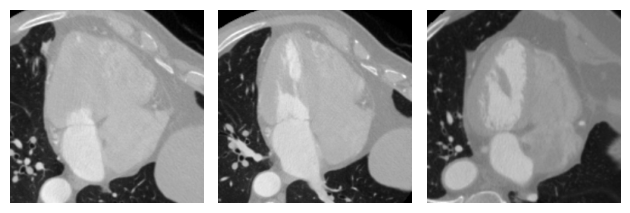

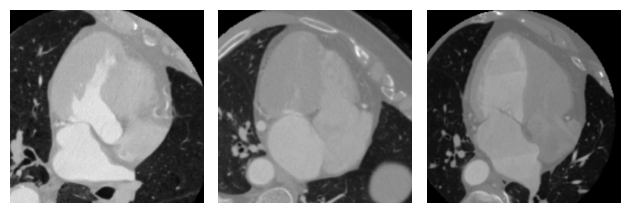

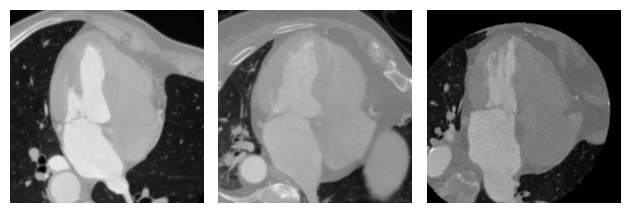

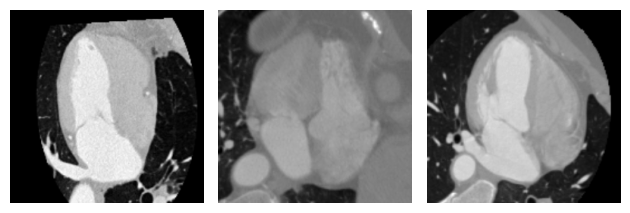

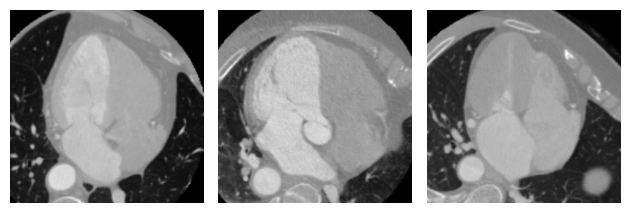

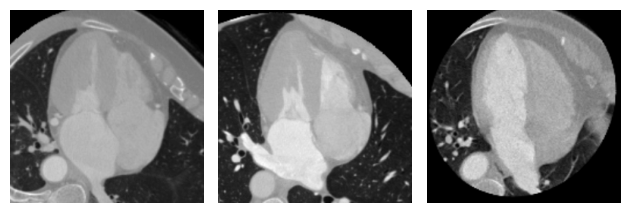

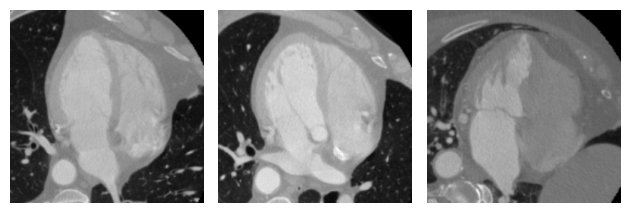

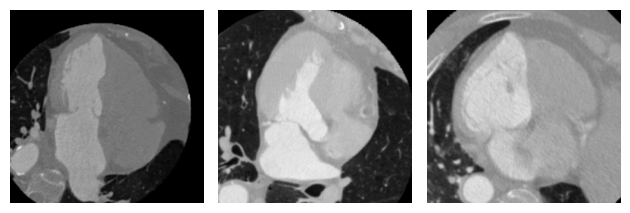

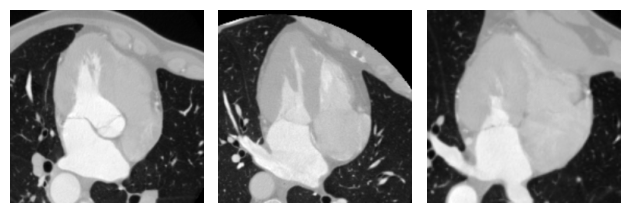

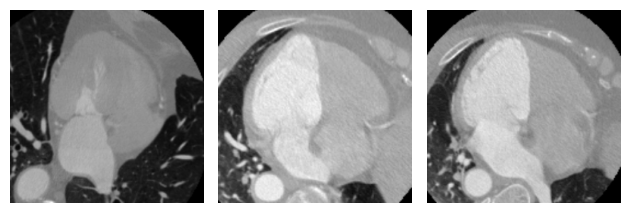

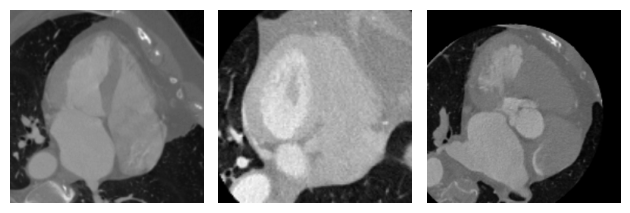

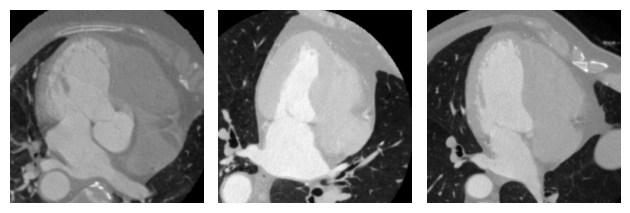

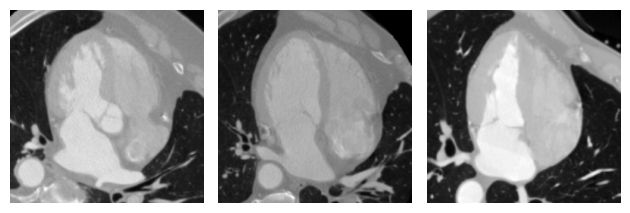

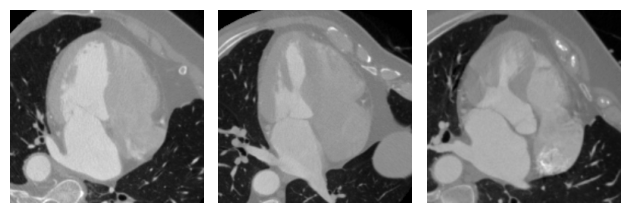

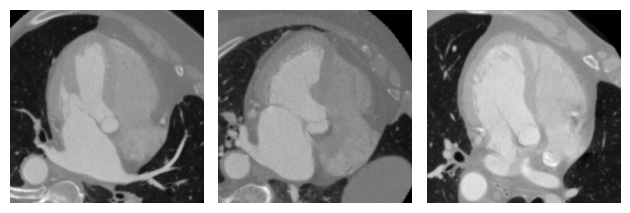

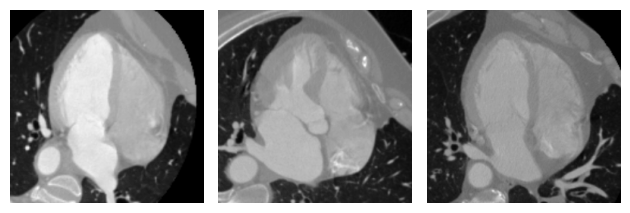

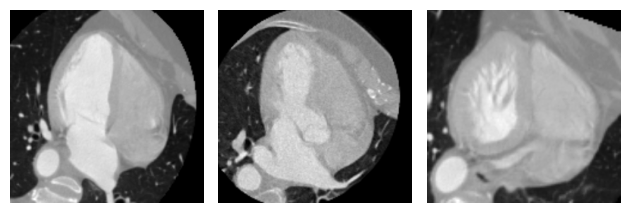

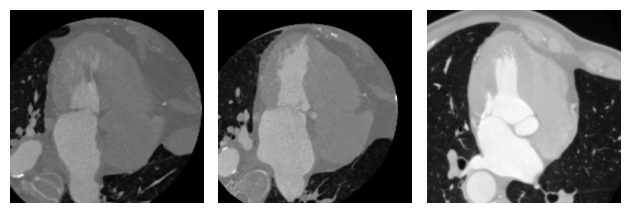

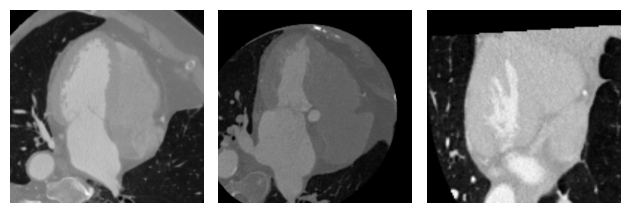

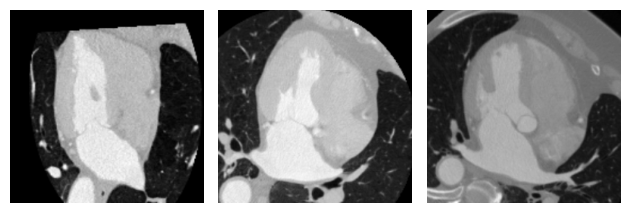

In [51]:
i=0

for batch in patch_data_loader:
    plt.figure()
    plt.subplot(1, 3, 1)
    plt.axis("off")
    plt.imshow(batch["image"][0].squeeze(0), cmap="gray")
    plt.subplot(1, 3, 2)
    plt.axis("off")
    plt.imshow(batch["image"][1].squeeze(0), cmap="gray")
    plt.subplot(1, 3, 3)
    plt.axis("off")
    plt.imshow(batch["image"][2].squeeze(0), cmap="gray")
    plt.tight_layout()
    plt.show()

    i += 1
    if i == 20:
        break

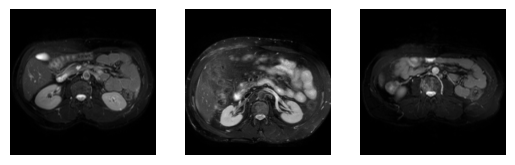

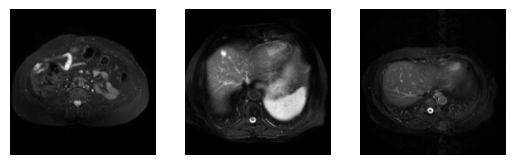

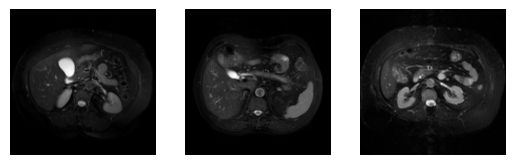

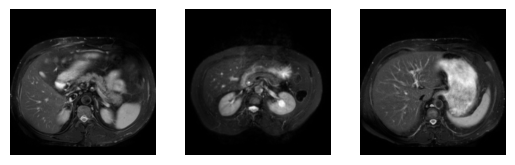

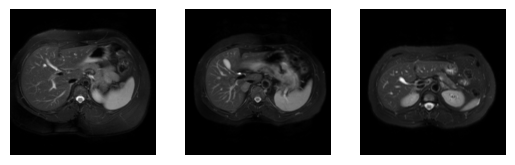

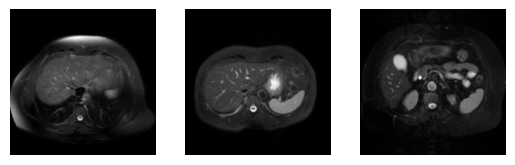

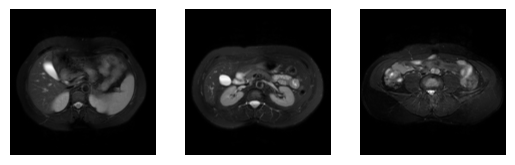

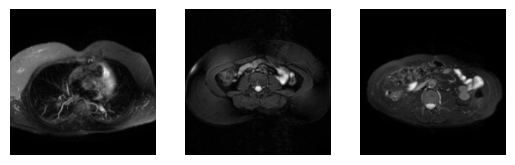

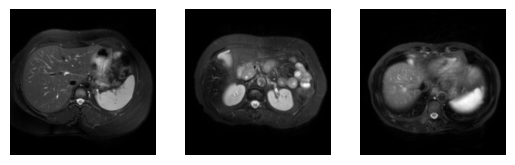

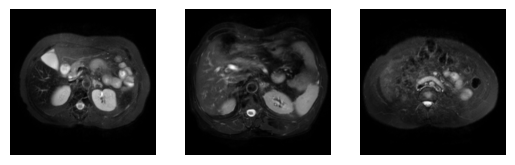

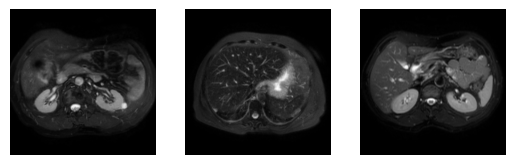

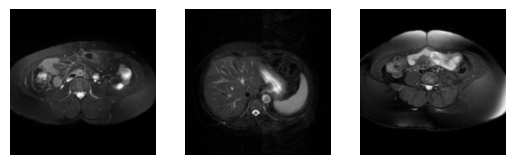

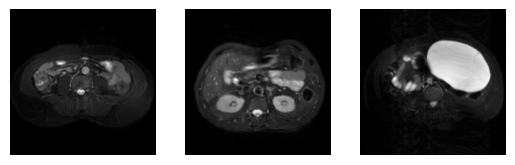

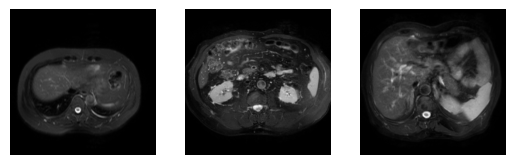

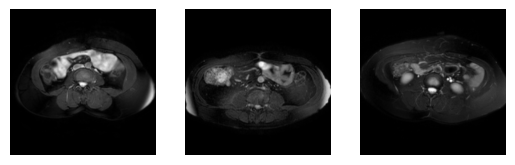

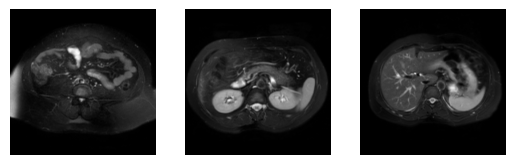

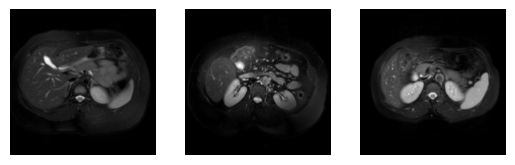

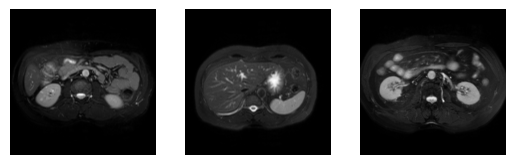

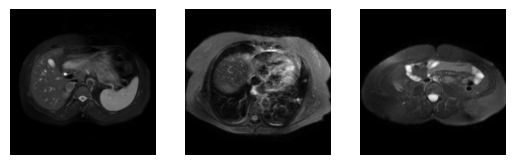

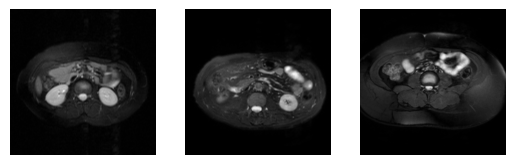

In [27]:
i=0

for batch in patch_data_loader:
    plt.figure()
    plt.subplot(1, 3, 1)
    plt.axis("off")
    plt.imshow(batch["image"][0].squeeze(0), cmap="gray")
    plt.subplot(1, 3, 2)
    plt.axis("off")
    plt.imshow(batch["image"][1].squeeze(0), cmap="gray")
    plt.subplot(1, 3, 3)
    plt.axis("off")
    plt.imshow(batch["image"][2].squeeze(0), cmap="gray")
    plt.show()

    i += 1
    if i == 20:
        break
    
    
    